In [1]:
from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT/"src"))

# Startup checks
from config import RAW_FILE
from startup_checks import ensure_project_dirs, check_required_data

ensure_project_dirs()
check_required_data(RAW_FILE)

print("Raw data:", RAW_FILE)

Raw data: /home/tl/stock-news-sentiment-bert-finbert/data/raw/financial_phrasebank.csv


In [2]:
from config import TEXT_COL, LABEL_COL, CLEAN_FILE
from preprocess import load_and_clean_data
from artifacts_utils import save_csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = load_and_clean_data(RAW_FILE)    # df returned is label normalized and free of NaN, empty text row 
df.head()

,text,label
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
# Display summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5842 non-null   object
 1   label   5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [5]:
# Show label distribution
count = df[LABEL_COL].value_counts()
percent = df[LABEL_COL].value_counts(normalize=True) * 100

result = (
    pd.DataFrame({"count": count, "percent": percent.map(lambda x: f"{x:.2f}%")}).reset_index(names=LABEL_COL)
)

result

,label,count,percent
0,neutral,3130,53.58%
1,positive,1852,31.70%
2,negative,860,14.72%


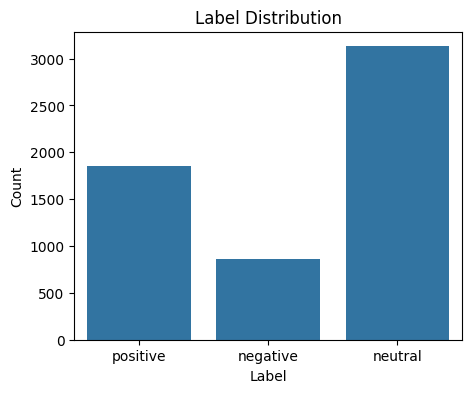

In [6]:
# Visualize label distribution
label_order = list(df[LABEL_COL].unique())

plt.figure(figsize=(5,4))
plt.title("Label Distribution")
sns.countplot(x=LABEL_COL, data=df, order=label_order)
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [7]:
# Text length statistics
df["text_length"] = df[TEXT_COL].apply(lambda sentence: len(sentence.split()))
length_stats = df["text_length"].describe()
percentile_95 = df["text_length"].quantile(0.95)

print(length_stats)
print(f"95% percentile = {percentile_95:.0f} words")

count    5842.000000
mean       21.004793
std        10.306465
min         2.000000
25%        13.000000
50%        19.000000
75%        27.000000
max        81.000000
Name: text_length, dtype: float64
95% percentile = 42 words


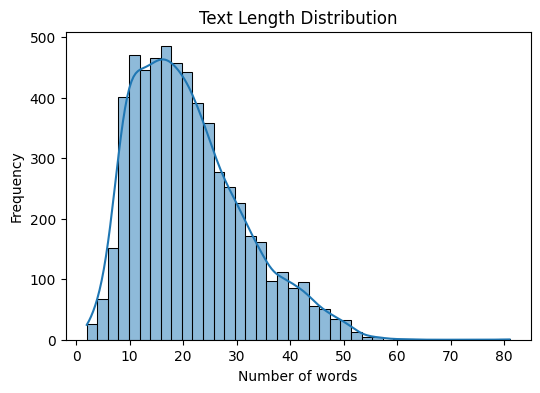

In [8]:
# Visualize text length distributions
plt.figure(figsize=(6, 4))
sns.histplot(df["text_length"], bins=40, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Inspect longest sentences
df.sort_values("text_length", ascending=False).head(5)[[TEXT_COL, LABEL_COL, "text_length"]]

,text,label,text_length
3800,"Supported Nokia phones include : N96 , N95-8GB...",neutral,81
2379,Body ES Vostok also owns stakes in power sales...,neutral,62
5179,Our customers come from the following countrie...,neutral,60
2251,3 January 2011 - Scandinavian lenders Sampo Ba...,neutral,57
3905,Our customers come from the following countrie...,neutral,57


In [10]:
# Finalize clean dataset
df_final = df[[TEXT_COL, LABEL_COL]].copy()

# Export clean version dataset to data/processed
print(save_csv(
    name="Cleaned dataset",
    df=df_final,
    path=CLEAN_FILE,
    overwrite=True
))

Cleaned dataset saved to: /home/tl/stock-news-sentiment-bert-finbert/data/processed/financial_phrasebank_clean.csv
/home/tl/stock-news-sentiment-bert-finbert/data/processed/financial_phrasebank_clean.csv


## Summary - Data Overview & Preparation for Transformer Models

### Objective
To perform exploratory data analysis and prepare a clean, standardized dataset for sentence-level Transformer-based sentiment classification models (BERT and FinBERT).

### Work Performed
- Loaded and cleaned the raw financial sentiment dataset from **data/raw/financial_phrasebank.csv**
  (removed NaN values, empty rows, and normalized labels)
- Normalized the dataset to the following canonical format:
  - **text** as the input sentence
  - **label** as the sentiment target
- Conducted exploratory data analysis:
  - Dataset structure and integrity checks (**df.info()**)
  - Label distribution analysis (counts, percentages, and visualization)
  - Sentence length statistics and distribution analysis
  - Inspection of longest sentences for data sanity checking

### Key Decisions
- Used the 95th percentile of sentence length as a reference when selecting
  **max_length** during tokenization in subsequent notebooks

### Results
- The dataset was verified to be suitable for sentence-level sentiment classification
  and Transformer-based tokenization

### Artifacts Produced
- Clean and standardized dataset:
  - **data/processed/financial_phrasebank_clean.csv**

### Takeaway
This notebook establishes a reliable and well-understood data foundation for
subsequent Transformer-based experiments.